In [ ]:
import matplotlib.pyplot as plt
import math
import cv2
import numpy as np
%matplotlib inline
img=plt.imread('test.png')



#print(img)
img=plt.imread('test.png')
img=1-img[:,:,1]
img=img.flatten()
img1=np.zeros([1,784],dtype=float)
img1[0]=img

print(img1.shape)

In [ ]:
batch2 = mnist.train.next_batch(20)
print(batch2[0].shape)
img=plt.imread('test.png')
print(batch2[0].shape)
batch2=batch2[0][0].reshape(28,28)
plt.imshow(img)
plt.imshow(batch2)
print(batch2)

In [ ]:
from tensorflow.examples.tutorials.mnist import input_data
mnist = input_data.read_data_sets('MNIST_data', one_hot=True)
import tensorflow as tf
sess = tf.InteractiveSession()
x = tf.placeholder(tf.float32, shape=[None, 784])
y_ = tf.placeholder(tf.float32, shape=[None, 10])

def weight_variable(shape):
    initial = tf.truncated_normal(shape, stddev=0.1)
    return tf.Variable(initial)

def bias_variable(shape):
    initial = tf.constant(0.1, shape=shape)
    return tf.Variable(initial)

def conv2d(x, W):
    return tf.nn.conv2d(x, W, strides=[1, 1, 1, 1], padding='SAME')

def max_pool_2x2(x):
    
    return tf.nn.max_pool(x, ksize=[1, 2, 2, 1],
                        strides=[1, 2, 2, 1], padding='SAME')


In [ ]:



W_conv1 = weight_variable([5, 5, 1, 32])
b_conv1 = bias_variable([32])
tx_image = tf.reshape(x, [-1, 28, 28, 1])

th_conv1 = tf.nn.relu(conv2d(tx_image, W_conv1) + b_conv1)


th_pool1 = max_pool_2x2(th_conv1)


W_conv2 = weight_variable([5, 5, 32, 64])
b_conv2 = bias_variable([64])

th_conv2 = tf.nn.relu(conv2d(th_pool1, W_conv2) + b_conv2)


th_pool2 = max_pool_2x2(th_conv2)

W_fc1 = weight_variable([7 * 7 * 64, 1024])
b_fc1 = bias_variable([1024])

th_pool2_flat = tf.reshape(th_pool2, [-1, 7*7*64])


th_fc1 = tf.nn.relu(tf.matmul(th_pool2_flat, W_fc1) + b_fc1)




W_fc2 = weight_variable([1024, 10])
b_fc2 = bias_variable([10])

ty_conv = tf.matmul(th_fc1, W_fc2) + b_fc2


cross_entropy = tf.reduce_mean(
    tf.nn.softmax_cross_entropy_with_logits(labels=y_, logits=ty_conv))
train_step = tf.train.AdamOptimizer(1e-4).minimize(cross_entropy)
correct_prediction = tf.equal(tf.argmax(ty_conv, 1), tf.argmax(y_, 1))
accuracy = tf.reduce_mean(tf.cast(correct_prediction, tf.float32))

sess = tf.InteractiveSession()
sess.run(tf.global_variables_initializer())
saver = tf.train.Saver()
saver.restore(sess, "tmp/model.ckpt")


In [ ]:
sess.run(tf.global_variables_initializer())
#print(W_conv1.eval())
for i in range(20000):
    batch = mnist.train.next_batch(50)
    if i % 1000 == 0:
            
        print('step',i)
    train_step.run(feed_dict={x: batch[0], y_: batch[1]})

save_path = saver.save(sess, "tmp/model.ckpt")
print("completed")

In [ ]:
#saver.restore(sess, "tmp/model.ckpt")
tmp=[]

xx = tf.placeholder(tf.float32, shape=[1, 784])
ximage = tf.reshape(xx, [-1, 28, 28, 1])


h_conv1 = tf.nn.relu(conv2d(ximage, W_conv1) + b_conv1)
tmp1=tf.Variable(tf.truncated_normal(tf.shape(h_conv1), stddev=0.1))

hconv1=tf.assign(tmp1,h_conv1)

h_pool1 = max_pool_2x2(hconv1)
tmp2=tf.Variable(tf.truncated_normal(tf.shape(h_pool1), stddev=0.1))

hpool1=tf.assign(tmp2,h_pool1)

h_conv2 = tf.nn.relu(conv2d(hpool1, W_conv2) + b_conv2)
tmp3=tf.Variable(tf.truncated_normal(tf.shape(h_conv2), stddev=0.1))
hconv2=tf.assign(tmp3,h_conv2)

h_pool2 = max_pool_2x2(hconv2)
tmp4=tf.Variable(tf.truncated_normal(tf.shape(h_pool2), stddev=0.1))
hpool2=tf.assign(tmp4,h_pool2)

h_pool2_flat = tf.reshape(hpool2, [-1, 7*7*64])
tmp44=tf.Variable(tf.truncated_normal(tf.shape(h_pool2_flat), stddev=0.1))
hpool2flat=tf.assign(tmp44,h_pool2_flat)

h_fc1 = tf.nn.relu(tf.matmul(hpool2flat, W_fc1) + b_fc1)
tmp5=tf.Variable(tf.truncated_normal(tf.shape(h_fc1), stddev=0.1))
hfc1=tf.assign(tmp5,h_fc1)




y_conv = tf.matmul(hfc1, W_fc2) + b_fc2
tmp6=tf.Variable(tf.truncated_normal(tf.shape(y_conv), stddev=0.1))
yconv=tf.assign(tmp6,y_conv)


In [ ]:
class Layers:
   
    def fc(self, points, layer, prevLayer):
        pnt1=[]
        blobs=net.blobs[prevLayer][0]
        if len(blobs.shape)>1:
            blobs=blobs.flatten()
        #print(points.shape,points)
        
        for i in points:
        
            pnt1.extend(np.where((np.multiply(blobs,net.params[layer][:,i])>0)==True))
        #print(pnt1[0])
        points=np.array(list(set(pnt1[0])))
        
        if len(net.blobs[prevLayer][0].shape)>1:
            #print(blobs.shape)
            t=np.array(np.unravel_index(points,net.blobs[prevLayer][0].shape))
            #print("t=",t.shape)
            return t
        #print("p=",points)
        return points

    def pool(self, points, prevLayer, K, S):
        #print(points.shape,points)
        x1=[]
        y1=[]
        z1=[]
        b1=net.blobs[prevLayer][0]
       
        x,y,z=points
        #print("shap=",points.shape)
        #print(x,y,z)
        for i in range(points.shape[1]):
            #print(np.argmax(b1[x[i]:x[i]+K,y[i]:y[i]+K,z[i]].flatten()))
            t=np.array(np.unravel_index(np.argmax(b1[S*x[i]:S*x[i]+K,S*y[i]:S*y[i]+K,z[i]].flatten()),(K,K)))
     
            x1.append(S*x[i]+t[0])
            y1.append(S*y[i]+t[1])
            z1.append(z[i])
        
        points=np.array([np.array(x1),np.array(y1),np.array(z1)])
        #points=np.array(list(set(points.T))).T
        return points
    
    def conv(self, points, layer, prevLayer, K, S, P, group=False):
        blob=np.copy(net.blobs[prevLayer][0])
        w=net.params[layer]
        pad=np.zeros((blob.shape[0],P,blob.shape[2]))
        
        pad1=np.zeros((P,blob.shape[1]+2*P,blob.shape[2]))
        b2=np.concatenate((pad,np.concatenate((blob,pad),axis=1)),axis=1)
        #print("b2=",b2.shape,pad1.shape,pad.shape)
        blob=np.concatenate((pad1,np.concatenate((b2,pad1),axis=0)),axis=0)
        t=[]
        x1=[]
        y1=[]
        z1=[]
     
        x,y,z=points
        for j in range(points.shape[1]):
            t=[]
            #print("j=",j)
            for i in range(blob.shape[2]):
               
                t.append(np.sum(np.multiply(blob[x[j]:x[j]+w.shape[0],y[j]:y[j]+w.shape[1],i],w[:,:,i,z[j]])))
            
            z1.append(np.argmax(t))
            x1.append(x[j])
            y1.append(y[j])

        points=[]
        points.append(np.array(x1))
        points.append(np.array(y1))
        points.append(np.array(z1))
        
        points=np.array(points)
        #points=np.array(list(set(points.T))).T
        return points


In [ ]:
def MSNet(points,layers):
    
    points = layers.fc(points=points, layer='prob', prevLayer='fc1')
    
    points = layers.fc(points=points, layer='fc1', prevLayer='pool2')
  
    #print("sdfsdFSDF",np.where(points[0]==6),np.where(points[1]==4),np.where(points[2]==15))
    points = layers.pool(points=points, prevLayer='conv2', K=2, S=2)
    points = layers.conv(points=points,  layer='conv2', prevLayer='pool1', K=3, S=1, P=2, group=True)
   
    points = layers.pool(points=points, prevLayer='conv1', K=2, S=2)
    points = layers.conv(points=points,  layer='conv1', prevLayer='data', K=3, S=1, P=2, group=True)
   
    return points

In [ ]:
class Net:
    def __init__(self):
        #print("Df")
        self.blobs={}
        self.params={}
    def update(self,name,data,weights):
        self.blobs[name]=data
        self.params[name]=weights

In [ ]:
#print(batch[0].shape,img1.shape)
import matplotlib.pyplot as plt
img=plt.imread('test.png')

img=1-img[:,:,1]
img=img.flatten()
img1=np.zeros([1,784],dtype=float)
img1[0]=img
x_image=img1.reshape(1,28,28,1)
#print(x_image.shape)
#img1=mnist.test.next_batch(1)[0]
points=sess.run(tf.argmax(yconv,1),feed_dict={xx:img1})


net=Net()

net.update("data",x_image,[])
net.update("conv1",tmp1.eval(),W_conv1.eval())
net.update("pool1",tmp2.eval(),[])
net.update("conv2",tmp3.eval(),W_conv2.eval())
net.update("pool2",tmp4.eval(),[])
net.update("fc1",tmp5.eval(),W_fc1.eval())
net.update("prob",tmp6.eval(),W_fc2.eval())

print("result=",points)

layers=Layers()
points=MSNet(points,layers)
#print("M=",np.array(points))
points=np.array(points)
#print("points=",points.shape)
def outlier_removal(points, diag,shape):
    neighbors = np.zeros((points.shape[1]))
    selpoints =[]
    for i in range(points.shape[1]):
        diff=np.sqrt(np.sum(np.square(points.T-points[:,i]) ,axis=1))
        neighbors[i]=np.sum(diff<diag)
    #print("outlier=",points.shape[1])
    for i in range(points.shape[1]):
        #print(neighbors[i])
        if neighbors[i] > 0.05*points.shape[1]:
            
            selpoints.append(points[:,i])    
       
    return np.array(selpoints)
diag = math.sqrt(x_image.shape[1]**2 + x_image.shape[2]**2)*0.1
points=outlier_removal(points,diag,(28,28)).T
#print("points=",points.shape)
def heatmap(img, points, sigma=20):
    k = (np.min(img.shape[1:3])) if (
        np.min(img.shape[:2]) % 2 == 1) else (np.min(img.shape[:2])-1)
    mask = np.zeros(img.shape[:2])
    shape = mask.shape
    #print("mask",mask.shape)
    for i in range(points.shape[1]):
        # Check if inside the image
        if points[0, i] < shape[0] and points[1,i] < shape[1]:
            mask[points[0, i], points[1, i]] = 1
    #print("mask=",mask)
    # Gaussian blur the points to get a nice heatmap
    blur = cv2.GaussianBlur(mask, (27, 27), sigmaX=1,sigmaY=1)
    blur = blur*255/np.max(blur)
    #print("blur=",blur.shape)
    #_, ax = plt.subplots(1,2, figsize=(15, 5))
    
    
    #ax[0].set_title('CNN Fixations')
    plt.imshow(img)
    plt.imshow(blur, 'jet', alpha=0.3),
    #ax[1].imshow(img)
    #ax[1].scatter(points[0, :], points[1, :]),
    plt.show()
    return blur
img=plt.imread('test.png')
heatmap(img,np.array(points))




In [ ]:
print(data[4][1])
data1=np.random.shuffle(data)

print(data[4][1])
plt.imshow(data[4][0])
data[0][0].shape

In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import math
import cv2
import numpy as np
data=pd.read_csv("../datasets/MODIFIED SWAROOP.csv",header=None)

In [24]:
count=0
while(data[6][count]!='WIPRO GATE'):
    count+=1

In [25]:
print(count)

129


In [28]:
data1=data.loc[:count]

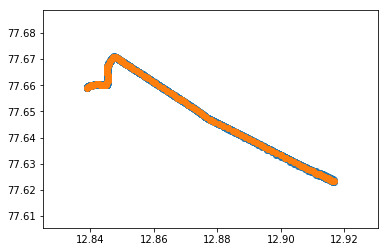

In [66]:
plt.scatter(data1[2],data1[3])
plt.show()

In [78]:
mask=np.zeros((np.power(100,1),np.power(100,1)))

c:\users\asus\anaconda3\envs\tensorflow\lib\site-packages\ipykernel_launcher.py:7: RuntimeWarning: divide by zero encountered in double_scalars
  import sys


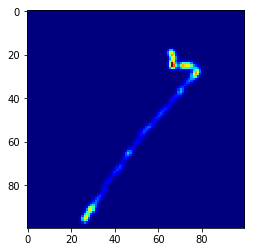

In [86]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import math
import cv2
import numpy as np
data=pd.read_csv("../datasets/MODIFIED SWAROOP.csv",header=None)
count=0
while(data[6][count]!='WIPRO GATE'):
    count+=1
data1=data.loc[:count]
mask=np.zeros((np.power(100,1),np.power(100,1)))
for i in range(129,0,-1):
        # Check if inside the image
    lat=(int)(((data1[2][i]-12.82)/(12.92-12.82))*100)
    long=(int)(((data1[3][i]-77.60)/(77.69-77.60))*100)
    
    mask[lat,long]=1/data1[10][i]
    if(mask[lat,long]==math.inf):
        
        mask[lat,long]=100
    #print(lat,long,mask[lat][long])
    #print("mask=",mask[lat,long])
    # Gaussian blur the points to get a nice heatmap
blur = cv2.GaussianBlur(mask,(999,999), sigmaX=1,sigmaY=1)
blur = blur*255/np.max(blur)

#print("blur=",blur.shape)
#print(blur)
    #_, ax = plt.subplots(1,2, figsize=(15, 5))
plt.imshow(blur, 'jet', alpha=1),
    #ax[1].imshow(img)
    #ax[1].scatter(points[0, :], points[1, :]),
plt.show()